# **<p align="center">DIAGNOSIS OF DIABETES </p>**

The objective of this project is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In [88]:
import pandas as pd

total_data =  pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.to_csv("../data/raw/decision-tree-diabetes-project")
total_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<p align="center">EXPLORATORY DATA ANALYSIS</p>**

In [89]:
total_data.shape

(768, 9)

The Dataset contains 768 rows and 9 columns

In [90]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 9 numeric variables and 0 categorical variables. 

In [91]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


There are not duplicate rows

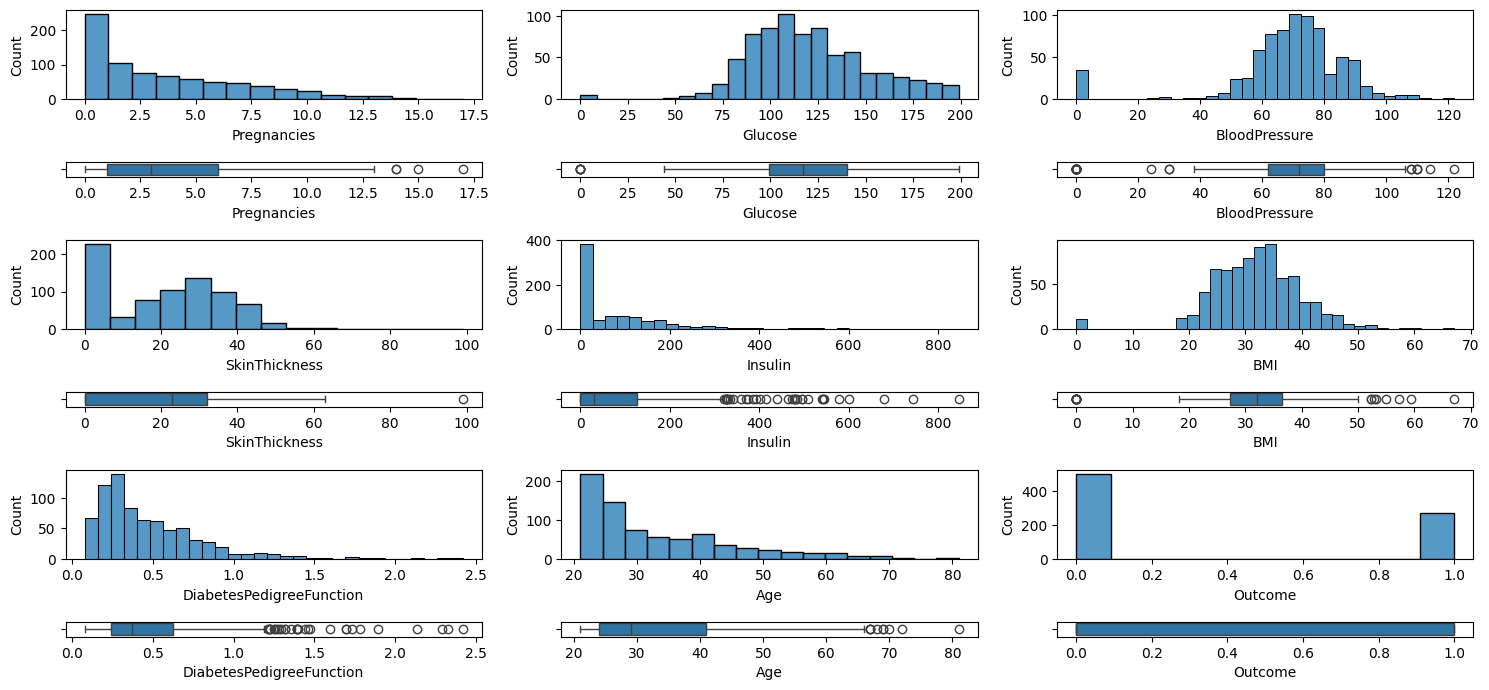

In [92]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(6, 3, figsize = (15, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Create a multiple figure with histograms and boxplots
sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 0], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")
sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")
sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")

plt.tight_layout()

plt.show()

In all the graphs, no very atypical values ​​are observed, in almost all of them a normal distribution is observed. In the 'insulin' graph there is a minimal amount of data above the average, but these results may be true, because there are patients who may have these insulin levels.

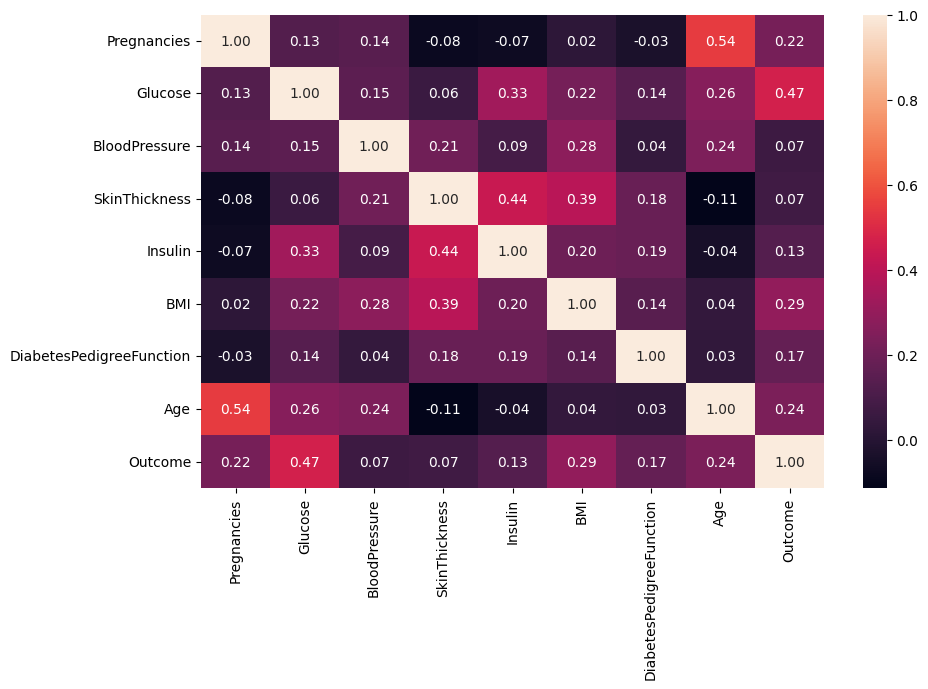

In [93]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

The variables between which there is the most strong correlation are glucose and the positive response. Same between Insuline and SkinThickness and Age and Pregnancies.

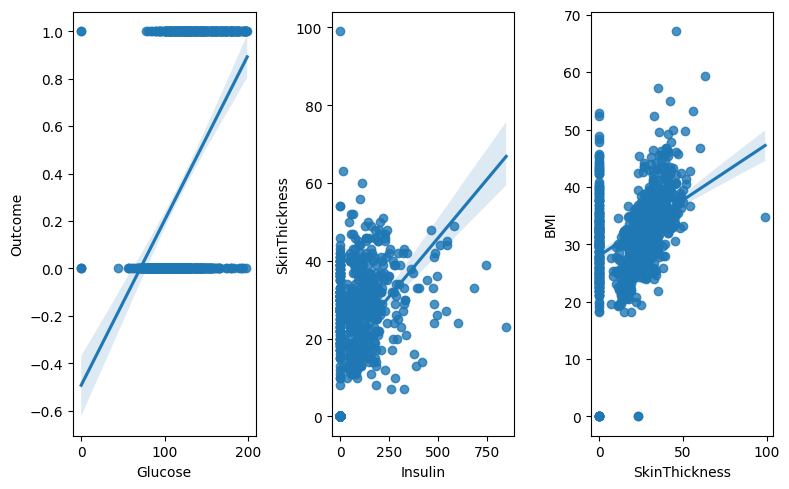

In [94]:
fig, axis = plt.subplots(figsize = (8, 5), ncols = 3)

sns.regplot(ax = axis[0], data = total_data, x = "Glucose", y = "Outcome")
sns.regplot(ax = axis[1], data = total_data, x = "Insulin", y = "SkinThickness")
sns.regplot(ax = axis[2], data = total_data, x = "SkinThickness", y = "BMI")

plt.tight_layout()

plt.show()


In the first graph you can see that when glucose increases, there is a greater probability that the response to diabetes will be positive, the same occurs with insulin content and Skin Thickness.

*Feature Engineering:*

In [95]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Values ​​that may seem atypical may not be, since they are not impossible to exist.

In [96]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no missing values ​​in the dataframe

*FEATURE SCALING:*

In [97]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


*FEATURE SELECTION:*

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


In [100]:
from sklearn.feature_selection import f_classif, SelectKBest

# With k = 5 we decide to delete 2 variables of the dataset
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.304,21.0
1,9.0,112.0,28.2,1.282,50.0
2,1.0,139.0,28.7,0.654,22.0
3,0.0,161.0,21.9,0.254,65.0
4,6.0,134.0,46.2,0.238,46.0


In [101]:
X_test_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,34.0,0.430,43.0
1,2.0,112.0,35.7,0.148,21.0
2,2.0,108.0,30.8,0.158,21.0
3,8.0,107.0,24.6,0.856,34.0
4,7.0,136.0,29.9,0.210,50.0


In [102]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

X_train_sel.to_csv("../data/processed/diabetes_train.csv", index=False)
X_test_sel.to_csv("../data/processed/diabetes_test.csv", index=False)

**<p align="center">DECISION TREE</p>**

*Step 1. Reading the processed dataset*

In [103]:
train_data = pd.read_csv("../data/processed/diabetes_train.csv")
test_data = pd.read_csv("../data/processed/diabetes_test.csv")

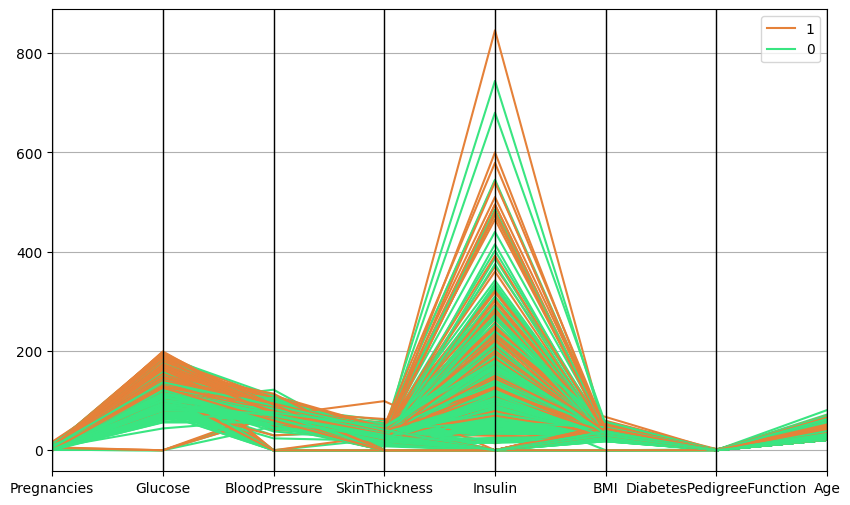

In [104]:
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.show()

*Step 2: Model initialization and training*

In [105]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

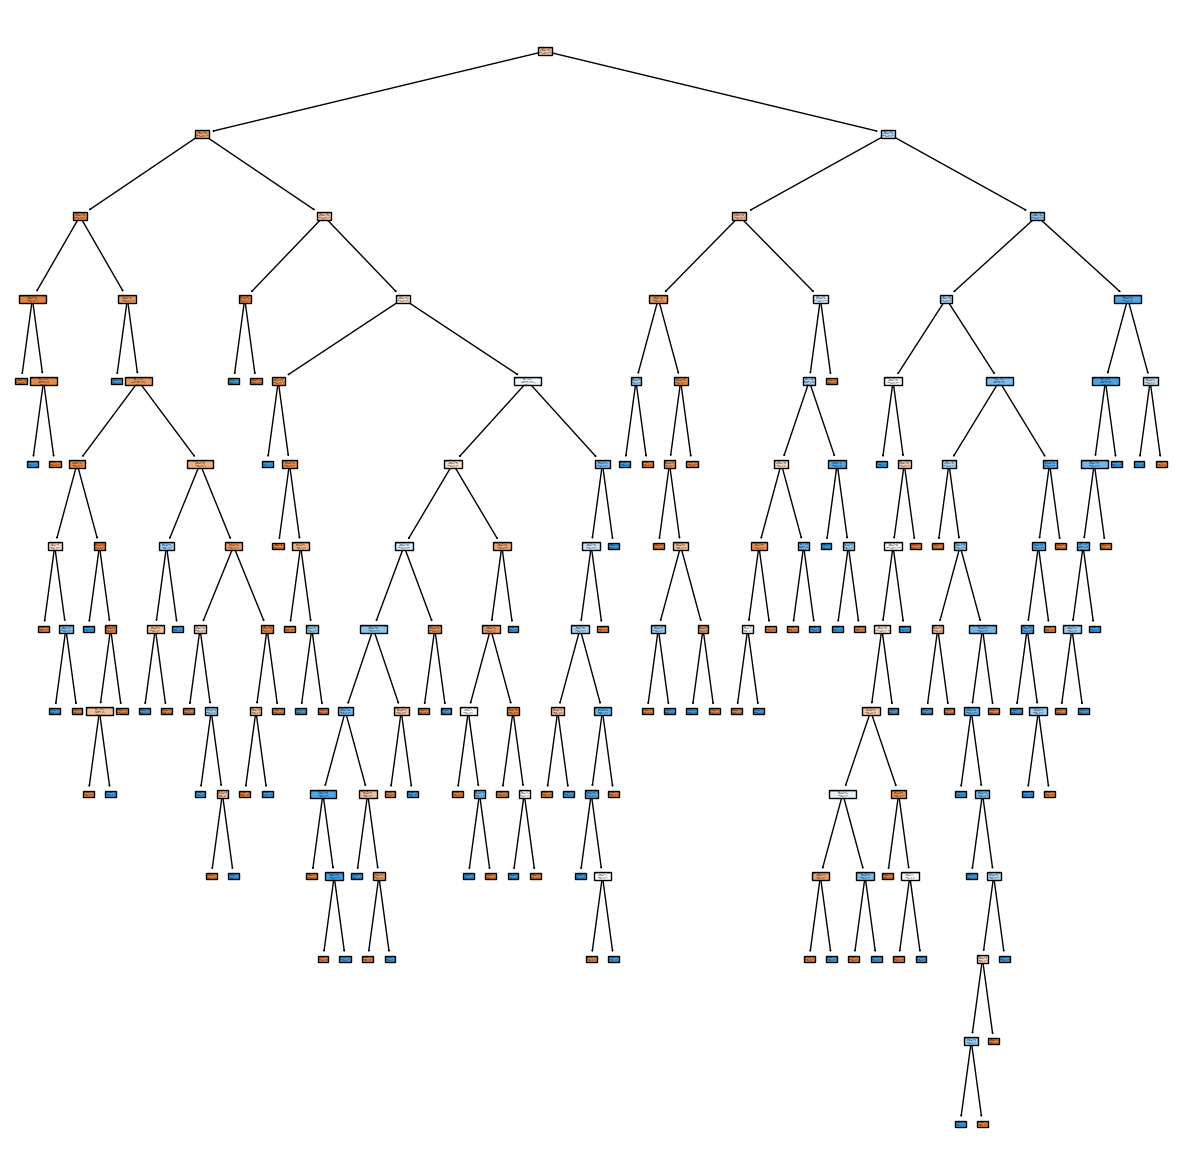

In [106]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

*Step 3. Model Prediction*

In [107]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

We use 'accuracy' to measure the fraction of predictions that the model made correctly and we obtain a value less than 75%, so it seems necessary to adjust the model's hyperparameters to optimize the results of the tree.

*HYPERPARAMETER OPTIMIZATION*

In [109]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

# Hyperparameters that we want to explore:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Search in the grid:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Let's reemplace the best hyperparameters:

In [110]:
best_params = {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
model_final = DecisionTreeClassifier(**best_params)

# Using the training data:
model_final.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3)

In [111]:
# We evaluate the final model:
y_pred = model_final.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [112]:
accuracy_score(y_test, y_pred)

0.7597402597402597

By adjusting the best hyperparameters we obtain that the precision increased to 76%, two percentage points higher than without optimization. Therefore we consider the model valid.

*Step 4. Saving the model*

In [113]:
from pickle import dump

dump(model, open("decision_tree_classifier_42.sav", "wb"))